In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-app-reviews/chatgpt_reviews.csv


In [2]:
# Read the data from the CSV file(s)
df = pd.read_csv('/kaggle/input/chatgpt-app-reviews/chatgpt_reviews.csv')



df.head()

,date,title,review,rating
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check the data types of each column
data_types = df.dtypes

missing_values, duplicate_rows, data_types


(date      0
 title     0
 review    0
 rating    0
 dtype: int64,
 0,
 date      object
 title     object
 review    object
 rating     int64
 dtype: object)

In [4]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check the data types of each column again to confirm
df.dtypes


date      datetime64[ns]
title             object
review            object
rating             int64
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import numpy as np
import calendar
from PIL import Image
import io

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Create directory to save plots
os.makedirs("/mnt/data/plots", exist_ok=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 0, 'Rating')

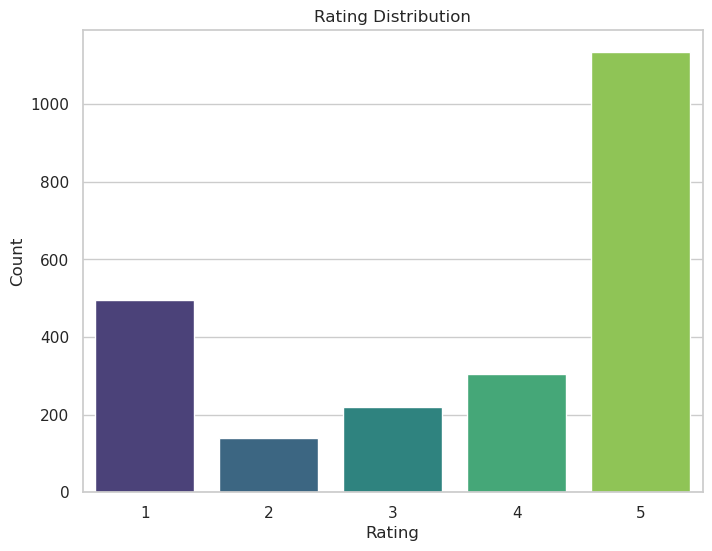

In [6]:
# 1. Rating distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Rating Distribution')
plt.ylabel('Count')
plt.xlabel('Rating')


Text(0.5, 0, 'Rating')

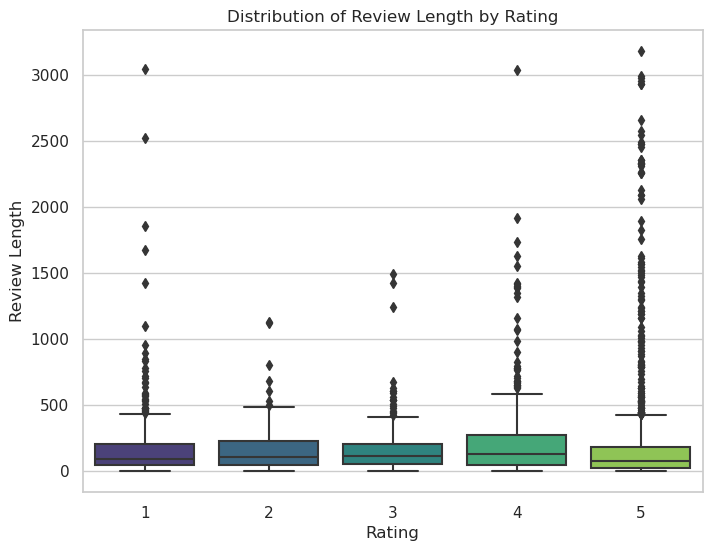

In [7]:
# 2. Distribution of review length by rating
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='rating', y='review_length', palette='viridis')
plt.title('Distribution of Review Length by Rating')
plt.ylabel('Review Length')
plt.xlabel('Rating')

In [8]:

# Importing required libraries for NLP
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [9]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = ''.join(c for c in text if c not in ('!', '.', ':', ',', '?', '(', ')', '[', ']', '{', '}', '"', "'"))
    return text

Text(0.5, 32.249999999999986, 'Frequency')

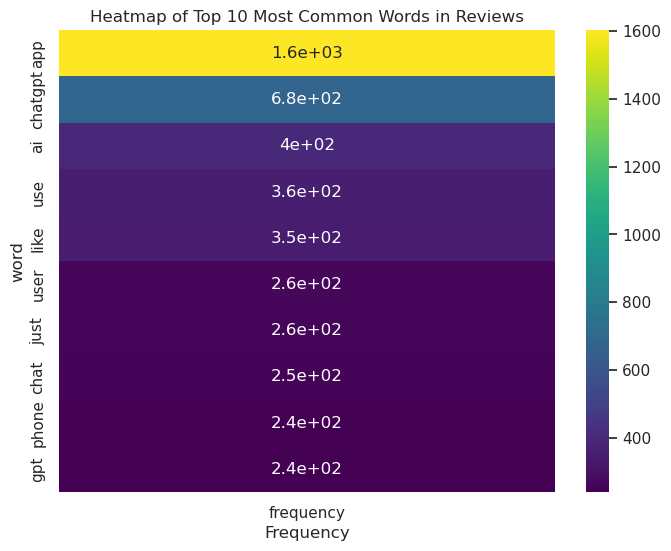

In [10]:
# Apply the preprocessing function to the reviews
df['processed_review'] = df['review'].apply(preprocess_text)

# Compute sentiment polarity for each review
df['sentiment_polarity'] = df['processed_review'].apply(lambda review: TextBlob(review).sentiment.polarity)

# 6. Word cloud of most frequent words in the reviews
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(df['processed_review']))

# Save the word cloud
wordcloud.to_file("/mnt/data/plots/wordcloud.png")

# 6. Heatmap of words in reviews for each rating
vec = CountVectorizer(stop_words='english').fit(df['processed_review'])
bag_of_words = vec.transform(df['processed_review'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = words_freq[:10]

common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])
common_words_df = common_words_df.set_index('word')

plt.figure(figsize=(8,6))
sns.heatmap(common_words_df, cmap='viridis', annot=True)
plt.title('Heatmap of Top 10 Most Common Words in Reviews')
plt.xlabel('Frequency')

In [11]:
# For the subsequent visualizations, we will use a random sample of 5000 reviews due to potential memory limitations.
df_sample = df.sample(n=1000, random_state=42)

In [12]:
# Apply the preprocessing function to the reviews
df_sample['processed_review'] = df_sample['review'].apply(preprocess_text)

# Compute sentiment polarity for each review
df_sample['sentiment_polarity'] = df_sample['processed_review'].apply(lambda review: TextBlob(review).sentiment.polarity)

# 7. Word cloud of most frequent words in the reviews
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(df_sample['processed_review']))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'chatgpt app'),
  Text(1, 0, 'ios app'),
  Text(2, 0, 'phone number'),
  Text(3, 0, 'user experience'),
  Text(4, 0, 'chatgpt ios'),
  Text(5, 0, 'haptic feedback'),
  Text(6, 0, 'user friendly'),
  Text(7, 0, 'web version'),
  Text(8, 0, 'chat gpt'),
  Text(9, 0, 'language model')])

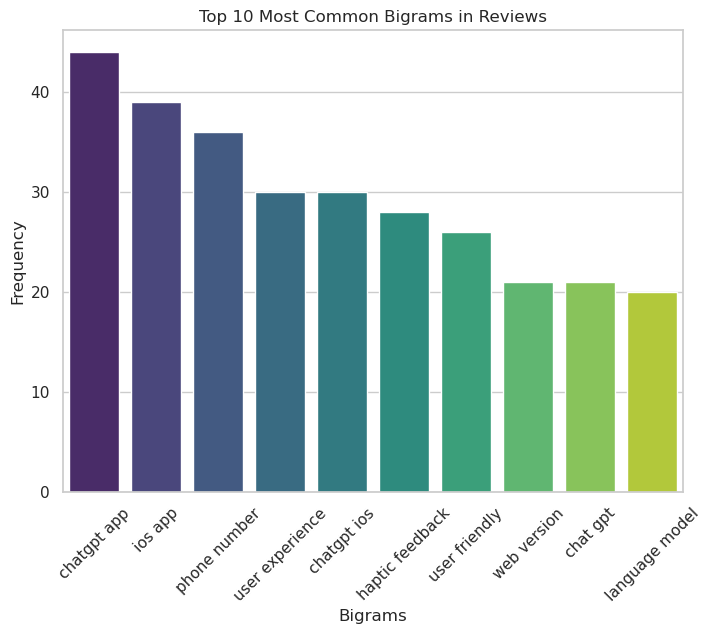

In [13]:
# 8. Top bigrams in reviews
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_vectorizer.fit(df_sample['processed_review'])
bigram_bag_of_words = bigram_vectorizer.transform(df_sample['processed_review'])
sum_bigrams = bigram_bag_of_words.sum(axis=0)
bigrams_freq = [(bigram, sum_bigrams[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key = lambda x: x[1], reverse=True)
common_bigrams = bigrams_freq[:10]

common_bigrams_df = pd.DataFrame(common_bigrams, columns=['bigram', 'frequency'])
common_bigrams_df = common_bigrams_df.set_index('bigram')

plt.figure(figsize=(8,6))
sns.barplot(x=common_bigrams_df.index, y='frequency', data=common_bigrams_df, palette='viridis')
plt.title('Top 10 Most Common Bigrams in Reviews')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)




Text(0, 0.5, 'Frequency')

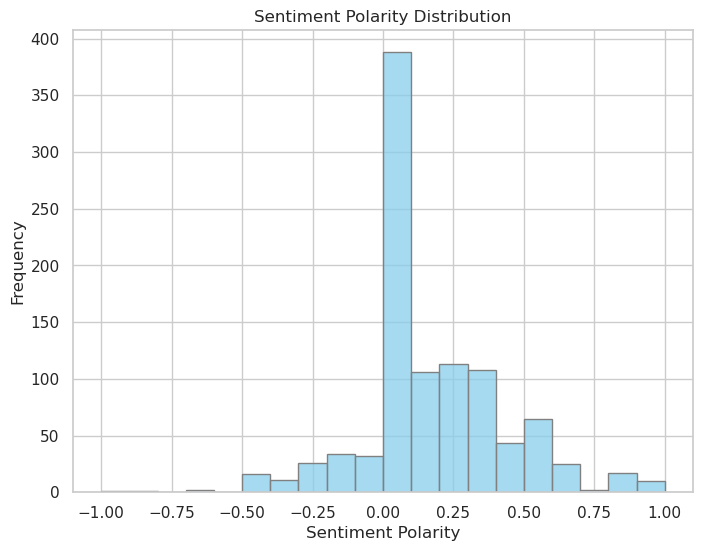

In [14]:
# 9. Sentiment polarity distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df_sample, x='sentiment_polarity', bins=20, color='skyblue', edgecolor='gray')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

Text(0.5, 0, 'Rating')

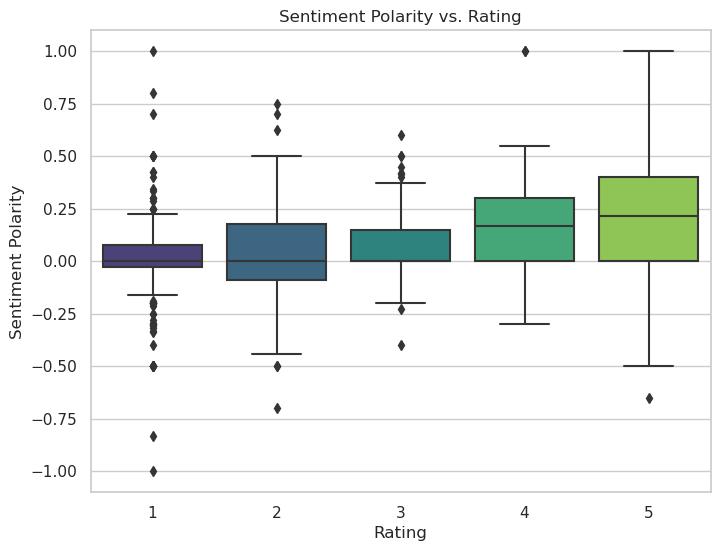

In [15]:
# 10. Sentiment polarity vs. rating
plt.figure(figsize=(8,6))
sns.boxplot(data=df_sample, x='rating', y='sentiment_polarity', palette='viridis')
plt.title('Sentiment Polarity vs. Rating')
plt.ylabel('Sentiment Polarity')
plt.xlabel('Rating')
